In [74]:
import seaborn as sns
import scipy.io
import numpy as np

In [75]:
import pandas as pd
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfTransformer
import matplotlib.pyplot as plt

In [ ]:
from umap import UMAP

## Загружаем данные

In [36]:
matrix = scipy.io.mmread('../Datasets/HSC/matrix.mtx')

In [47]:
labels = pd.read_csv('../Datasets/HSC/labels_unique.tsv', sep='\t', header=None)

### Кандидат 1. UMAP

In [ ]:
clustering = UMAP()
clustering.fit_transform(matrix.T)

In [ ]:
metadata = pd.DataFrame(labels)
metadata['UMAP_raw1'] = clustering.embedding_[:, 0]
metadata['UMAP_raw2'] = clustering.embedding_[:, 1]

### Кандидат 2. PCA + UMAP

In [ ]:
pca = TruncatedSVD(n_components=50)
pca_transformed = pca.fit_transform(matrix.T)
umap_pca = UMAP()
umap_pca.fit_transform(pca_transformed)
metadata['UMAP_PCA1'] = umap_pca.embedding_[:, 0]
metadata['UMAP_PCA2'] = umap_pca.embedding_[:, 1]

### Кандидат 3. TFIDF + PCA + UMAP

In [48]:
transformer = TfidfTransformer()

In [49]:
tf_idf_matrix = transformer.fit_transform(matrix)

In [50]:
tf_idf_matrix

<237450x2034 sparse matrix of type '<class 'numpy.float64'>'
	with 13634167 stored elements in Compressed Sparse Row format>

In [51]:
pca_tf_idf = TruncatedSVD(n_components=50)
pca_tf_idf_matrix = pca_tf_idf.fit_transform(tf_idf_matrix.T)



In [53]:
umap_pca_tf_idf = UMAP()
umap_pca_tf_idf.fit_transform(pca_tf_idf_matrix)
metadata['UMAP_PCA_TFIDF_1'] = umap_pca_tf_idf.embedding_[:, 0]
metadata['UMAP_PCA_TFIDF_2'] = umap_pca_tf_idf.embedding_[:, 1]

### Сравниваем результаты!

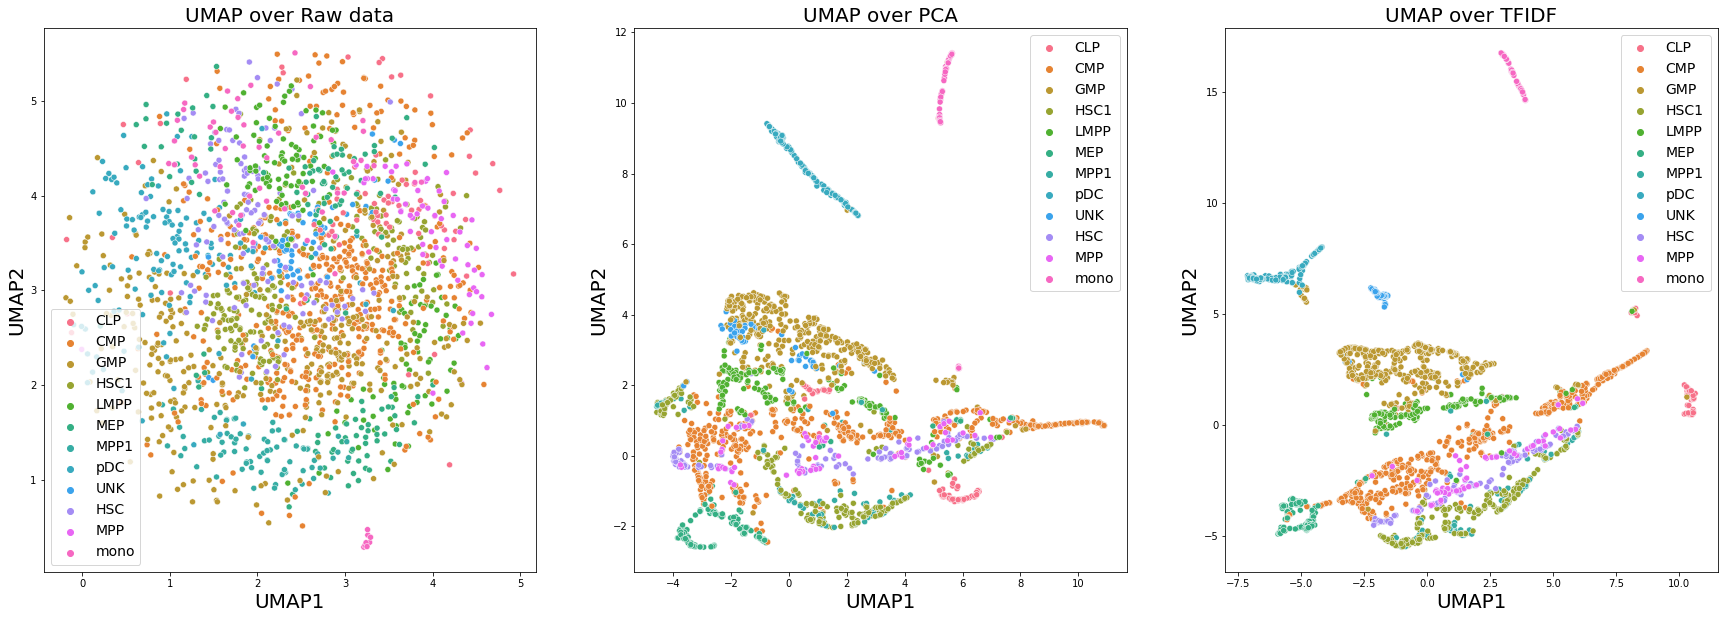

In [73]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))
sns.scatterplot(data=metadata, x='UMAP_raw1', y='UMAP_raw2', hue=1, ax=ax[0])
ax[0].set_xlabel('UMAP1', fontsize=20)
ax[0].set_ylabel('UMAP2', fontsize=20)
ax[0].set_title('UMAP over Raw data', fontsize=20)
ax[0].legend(prop={'size': 14})

sns.scatterplot(data=metadata, x='UMAP_PCA1', y='UMAP_PCA2', hue=1, ax=ax[1])
ax[1].set_xlabel('UMAP1', fontsize=20)
ax[1].set_ylabel('UMAP2', fontsize=20)
ax[1].set_title('UMAP over PCA', fontsize=20)
ax[1].legend(prop={'size': 14})

sns.scatterplot(data=metadata, x='UMAP_PCA_TFIDF_1', y='UMAP_PCA_TFIDF_2', hue=1, ax=ax[2])
ax[2].set_xlabel('UMAP1', fontsize=20)
ax[2].set_ylabel('UMAP2', fontsize=20)
ax[2].set_title('UMAP over TFIDF', fontsize=20)
ax[2].legend(prop={'size': 14})

fig.savefig('ClusteringComparison.png', bbox_inches='tight')

### Замеряем метрики

In [76]:
from sklearn.metrics.cluster import adjusted_rand_score, silhouette_score

In [77]:
from sklearn.cluster import KMeans

In [78]:
kmeans = KMeans(n_clusters=12)
kmeans.fit(clustering.embedding_)

KMeans(n_clusters=12)

In [83]:
labels_true = labels[1].astype('category').cat.codes # Converting to categorical data

In [86]:
print(f'ARI: {adjusted_rand_score(labels_true, kmeans.labels_)}')
print(f'Silhouette score: {silhouette_score(clustering.embedding_, labels_true)}')

ARI: 0.09770656717278695
Silhouette score: -0.20023858547210693


### PCA

In [88]:
kmeans_pca = KMeans(n_clusters=12)
kmeans_pca.fit(umap_pca.embedding_)

KMeans(n_clusters=12)

In [89]:
print(f'ARI: {adjusted_rand_score(labels_true, kmeans_pca.labels_)}')
print(f'Silhouette score: {silhouette_score(umap_pca.embedding_, labels_true)}')

ARI: 0.266228352932262
Silhouette score: -0.08654675632715225


### PCA + TF-IDF

In [90]:
kmeans_pca_tfidf = KMeans(n_clusters=12)
kmeans_pca_tfidf.fit(umap_pca_tf_idf.embedding_)

KMeans(n_clusters=12)

In [91]:
print(f'ARI: {adjusted_rand_score(labels_true, kmeans_pca_tfidf.labels_)}')
print(f'Silhouette score: {silhouette_score(umap_pca_tf_idf.embedding_, labels_true)}')

ARI: 0.32171437165207883
Silhouette score: 0.1082807332277298
